In [57]:
import numpy as np
import math

# Vertical Stress due to point load
def σv(point_load=0,radius=0, depth=1):
    Q = point_load # kN
    r = radius  # meters
    z = depth   # meters
    vertical_stress = (3*Q/(2 * math.pi * z**2 ))*( 1/(1+(r/z)**2))**(5/2)
    return vertical_stress

class Point():
    def __init__(self,x,y,z=0,Q=0):
        self.x = x
        self.y = y
        self.z = z
        self.Q = Q
        self.sigma = 0
        self.over_burden_pressure = 0
        self.total_pressure = 0 
    def __str__(self):
        return f"x:{self.x} y:{self.y} z:{self.z} Q:{self.Q} sigma:{self.sigma} overburden_p:{self.over_burden_pressure} total_pressure: {self.total_pressure}"
    def add_pressure(self,p):
        self.sigma += p
        
def get_point_list():
    width = 37 # along y axis
    length = 200 # along x axis

    p1 = Point(1.5,0)
    p2 = Point(2.8,2.25)
    p3 = Point(0.201,2.25)

    x_offset = 2.598
    y_offset = 2.25

    point_list = []

    for y in np.arange(0,width, y_offset):
        for x in np.arange(0,length,x_offset):
            point_list.append(Point(p1.x + x, p1.y + y))
            point_list.append(Point(p2.x + x, p2.y + y))
            point_list.append(Point(p3.x + x, p3.y + y))
    total_weight = 307*24*length # kN
    point_load_Q  = (total_weight)/len(point_list)
    
    for p in point_list:
        p.Q = point_load_Q
    
    return point_list

def get_pz_list(xmin=-20,xmax=120,ymin=-20,ymax=57, interval=1):
    xs = np.arange(xmin,xmax,interval)
    ys = np.arange(ymin,ymax,interval)
    pz_list=[]
    for x in xs:
        for y in ys:
            pz_list.append(Point(x,y))
    return pz_list

def σv_mod(p_list,pn_list,depth):
    z= depth
    for p in pn_list:
        p.sigma=0
    
        for point in p_list:
            r = math.sqrt((p.y-point.y)**2 + (p.x-point.x)**2)
            p.z = z
            p.sigma += σv(point_load=point.Q,radius=r, depth=z)
            
        p.over_burden_pressure = (27 * z) #27kN/m3
        p.total_pressure = p.sigma + p.over_burden_pressure

    return pn_list

def σv_mod2(p_list,px,py,depth):
    z= depth

    sigma=0
    
    for point in p_list:
        pty = float(point.y)
        ptx = float(point.x)
        r = np.sqrt((py-pty)**2 + (px-ptx)**2)
        z = z
        sigma += σv(point_load=point.Q,radius=r, depth=z)            
    over_burden_pressure = (27 * z) #27kN/m3
    hydrostatic_pressure = 9.8 * 11 # 9.8 kn/m3
    total_pressure = sigma + over_burden_pressure + hydrostatic_pressure

    return total_pressure
        


In [59]:
#point_list = [Point(0,0,0,Q=24)]

#pz_list = [Point(1.5,0)]

point_list = get_point_list()
#pz_list = get_pz_list(xmin=0,xmax=100,ymin=0,ymax=40, interval=1)

In [293]:
answer = σv_mod(point_list,pz_list,1)



In [54]:
point_list[0].Q

375.2482811306341

In [55]:
print(len(point_list))

3927


In [56]:
print(len(point_list) * point_list[0].Q)

1473600.0


In [294]:
x=[]
y=[]
z=[]

for i in answer:
    x.append(i.x)
    y.append(i.y)
    z.append(i.total_pressure)

In [8]:
σv_mod2(point_list,0,0,1)

11.459155902616464

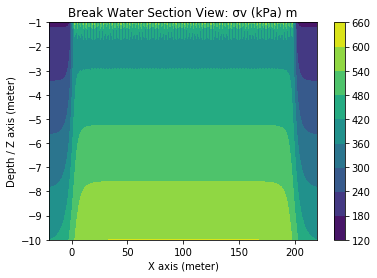

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm



N = 200
x = np.linspace(-20,220, 400)
z = np.linspace(1,10, N)
X, Z = np.meshgrid(x, z)



P = σv_mod2(point_list,X,18,Z)


fig, ax = plt.subplots()
CS = ax.contourf(X, -Z, P)
cbar=fig.colorbar(CS)
ax.set_title(f'Break Water Section View: σv (kPa) m')
plt.ylabel('Depth / Z axis (meter)')
plt.xlabel('X axis (meter)')
plt.savefig(f'main_plot/1. Section (z=1-10).png')
plt.show()


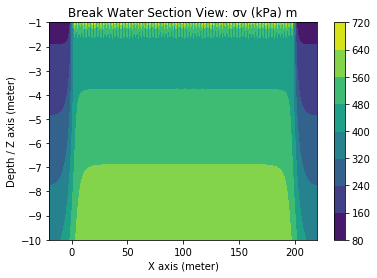

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm



N = 200
x = np.linspace(-20,220, 400)
z = np.linspace(1,10, N)
X, Z = np.meshgrid(x, z)



P = σv_mod2(point_list,X,18,Z)


fig, ax = plt.subplots()
CS = ax.contourf(X, -Z, P)
cbar=fig.colorbar(CS)
ax.set_title(f'Break Water Section View: σv (kPa) m')
plt.ylabel('Depth / Z axis (meter)')
plt.xlabel('X axis (meter)')
plt.savefig(f'main_plot/1. Section (z=1-10).png')
plt.show()
